<a href="https://colab.research.google.com/github/AlKafir666/Marvel-vs-DC-ML-and-BI/blob/master/Marvel_vs_DC_Genero.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###*MARVEL vs DC*

##*Género*

In [ ]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
link_marvel = '1MzMyOdZayjFnNUC04G5RR3Gnjm0tgTEW'

link_dc = '1c2ikQMvwOQ0H83SA0HZGbj77DthZ-N8y'

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib as mpl
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import numpy as np
import pandas as pd
downloaded = drive.CreateFile({'id':link_marvel}) 
downloaded.GetContentFile('marvel-wikia-data.csv')  
df_marvel = pd.read_csv('marvel-wikia-data.csv',sep=',')

downloaded = drive.CreateFile({'id':link_dc}) 
downloaded.GetContentFile('dc-wikia-data.csv')  
df_dc = pd.read_csv('dc-wikia-data.csv',sep=',')

In [ ]:
df_marvel['Univers'] = 'Marvel'
df_dc['Univers'] = 'DC'

In [ ]:
df_marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Year,Universo
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,1962.0,Marvel
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,1941.0,Marvel
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,1974.0,Marvel
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,1963.0,Marvel
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,1950.0,Marvel


In [ ]:
df_marvel['YEAR'] = df_marvel['Year']
df_marvel= df_marvel.drop(['Year'], axis=1)

In [ ]:
df_marvel.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Universo,YEAR
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,Marvel,1962.0
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,Marvel,1941.0
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,Marvel,1974.0
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,Marvel,1963.0
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,Marvel,1950.0


In [ ]:
df_dc.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,YEAR,Universo
0,1422,Batman (Bruce Wayne),\/wiki\/Batman_(Bruce_Wayne),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3093.0,"1939, May",1939.0,DC
1,23387,Superman (Clark Kent),\/wiki\/Superman_(Clark_Kent),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2496.0,"1986, October",1986.0,DC
2,1458,Green Lantern (Hal Jordan),\/wiki\/Green_Lantern_(Hal_Jordan),Secret Identity,Good Characters,Brown Eyes,Brown Hair,Male Characters,NaN,Living Characters,1565.0,"1959, October",1959.0,DC
3,1659,James Gordon (New Earth),\/wiki\/James_Gordon_(New_Earth),Public Identity,Good Characters,Brown Eyes,White Hair,Male Characters,NaN,Living Characters,1316.0,"1987, February",1987.0,DC
4,1576,Richard Grayson (New Earth),\/wiki\/Richard_Grayson_(New_Earth),Secret Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,1237.0,"1940, April",1940.0,DC


In [ ]:
df = pd.concat([df_marvel, df_dc])

In [ ]:
df['Univers'].unique()

array(['Marvel', 'DC'], dtype=object)

In [ ]:
df['Years_delta'] = 2014 - df['YEAR']
df['IMPORTANCE'] = df['APPEARANCES']/df['YEAR']

In [ ]:
df.head()

,page_id,name,urlslug,ID,ALIGN,EYE,HAIR,SEX,GSM,ALIVE,APPEARANCES,FIRST APPEARANCE,Universo,YEAR,Years_delta,IMPORTANCE
0,1678,Spider-Man (Peter Parker),\/Spider-Man_(Peter_Parker),Secret Identity,Good Characters,Hazel Eyes,Brown Hair,Male Characters,NaN,Living Characters,4043.0,Aug-62,Marvel,1962.0,52.0,2.060652
1,7139,Captain America (Steven Rogers),\/Captain_America_(Steven_Rogers),Public Identity,Good Characters,Blue Eyes,White Hair,Male Characters,NaN,Living Characters,3360.0,Mar-41,Marvel,1941.0,73.0,1.731066
2,64786,"Wolverine (James \""Logan\"" Howlett)",\/Wolverine_(James_%22Logan%22_Howlett),Public Identity,Neutral Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,3061.0,Oct-74,Marvel,1974.0,40.0,1.550659
3,1868,"Iron Man (Anthony \""Tony\"" Stark)",\/Iron_Man_(Anthony_%22Tony%22_Stark),Public Identity,Good Characters,Blue Eyes,Black Hair,Male Characters,NaN,Living Characters,2961.0,Mar-63,Marvel,1963.0,51.0,1.508406
4,2460,Thor (Thor Odinson),\/Thor_(Thor_Odinson),No Dual Identity,Good Characters,Blue Eyes,Blond Hair,Male Characters,NaN,Living Characters,2258.0,Nov-50,Marvel,1950.0,64.0,1.157949


In [ ]:
from google.colab import files
df.to_csv('Marvel_vs_DC.csv') 
files.download('Marvel_vs_DC.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_Year_Sex_Univ = df.groupby(['YEAR','Univers','SEX']).size().reset_index(name='counts')
df_Year_Sex_Univ

,YEAR,Universo,SEX,counts
0,1935.0,DC,Male Characters,1
1,1936.0,DC,Female Characters,2
2,1936.0,DC,Male Characters,7
3,1937.0,DC,Female Characters,1
4,1937.0,DC,Male Characters,3
...,...,...,...,...
335,2012.0,Marvel,Male Characters,140
336,2013.0,DC,Male Characters,1
337,2013.0,Marvel,Agender Characters,5
338,2013.0,Marvel,Female Characters,54


In [ ]:
df_Year_Sex_Univ_total = df.groupby(['YEAR','Univers']).size().reset_index(name='counts')
df_Year_Sex_Univ_total['Totals'] = df_Year_Sex_Univ_total['counts']
df_Year_Sex_Univ_total = df_Year_Sex_Univ_total.drop(['counts'], axis=1)
df_Year_Sex_Univ_total

,YEAR,Universo,Totals
0,1935.0,DC,1
1,1936.0,DC,9
2,1937.0,DC,4
3,1938.0,DC,10
4,1939.0,DC,18
...,...,...,...
149,2011.0,Marvel,349
150,2012.0,DC,5
151,2012.0,Marvel,201
152,2013.0,DC,1


In [ ]:
inner_join = pd.merge(df_Year_Sex_Univ,  
                      df_Year_Sex_Univ_total,  
                      on =['YEAR','Univers'],  
                      how ='inner') 
inner_join

,YEAR,Universo,SEX,counts,Totals
0,1935.0,DC,Male Characters,1,1
1,1936.0,DC,Female Characters,2,9
2,1936.0,DC,Male Characters,7,9
3,1937.0,DC,Female Characters,1,4
4,1937.0,DC,Male Characters,3,4
...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201
336,2013.0,DC,Male Characters,1,1
337,2013.0,Marvel,Agender Characters,5,167
338,2013.0,Marvel,Female Characters,54,167


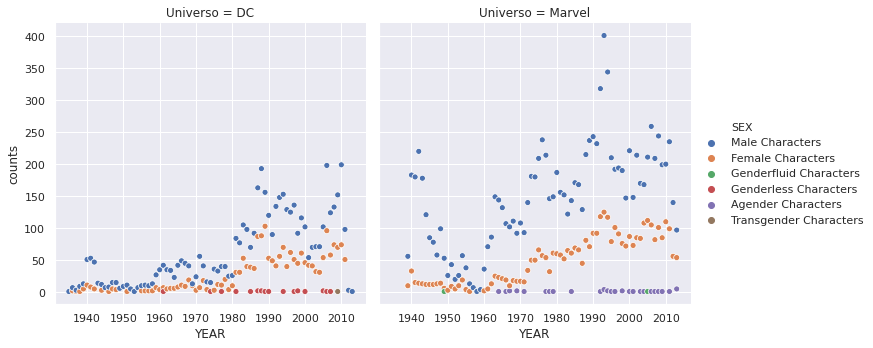

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="counts", col="Univers",
            hue="SEX",
            data=df_Year_Sex_Univ);

In [ ]:
inner_join ['Prop'] = inner_join ['counts'] / inner_join ['Totals'] *100
inner_join

,YEAR,Universo,SEX,counts,Totals,Prop
0,1935.0,DC,Male Characters,1,1,100.000000
1,1936.0,DC,Female Characters,2,9,22.222222
2,1936.0,DC,Male Characters,7,9,77.777778
3,1937.0,DC,Female Characters,1,4,25.000000
4,1937.0,DC,Male Characters,3,4,75.000000
...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201,69.651741
336,2013.0,DC,Male Characters,1,1,100.000000
337,2013.0,Marvel,Agender Characters,5,167,2.994012
338,2013.0,Marvel,Female Characters,54,167,32.335329


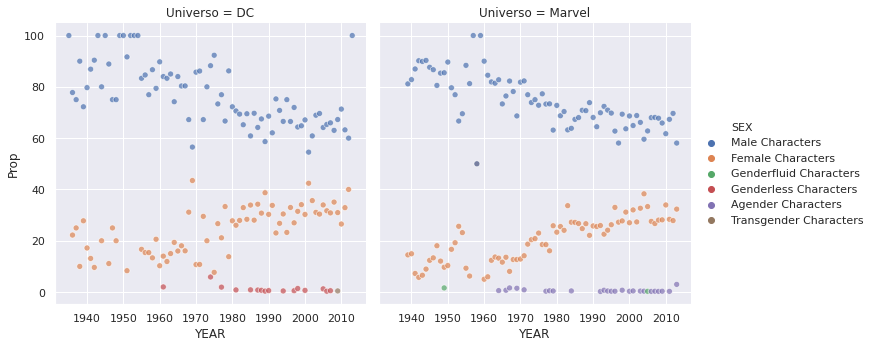

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Univers",
            hue="SEX", alpha=.7,
            data=inner_join);

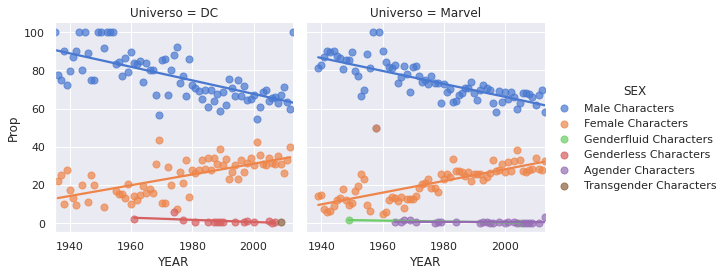

In [ ]:
#sns.set(style="ticks")

# Show the results of a linear regression within each dataset
sns.lmplot(x="YEAR", y="Prop", col="Univers", hue="SEX", data=inner_join,
           col_wrap=2, ci=None, palette="muted", height=4, 
           scatter_kws={"s": 50, "alpha": 0.7})

In [ ]:
df_App = df.groupby(['YEAR','Univers','SEX']).mean().reset_index()
df_App

,YEAR,Universo,SEX,page_id,APPEARANCES,Years_delta,IMPORTANCE
0,1935.0,DC,Male Characters,1702.000000,125.000000,79.0,0.064599
1,1936.0,DC,Female Characters,198449.000000,14.000000,78.0,0.007231
2,1936.0,DC,Male Characters,126934.000000,35.333333,78.0,0.018251
3,1937.0,DC,Female Characters,134362.000000,11.000000,77.0,0.005679
4,1937.0,DC,Male Characters,33586.000000,149.000000,77.0,0.076923
...,...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,571447.921429,6.106557,2.0,0.003035
336,2013.0,DC,Male Characters,85254.000000,1.000000,1.0,0.000497
337,2013.0,Marvel,Agender Characters,585988.400000,16.000000,1.0,0.007948
338,2013.0,Marvel,Female Characters,625022.666667,9.096154,1.0,0.004519


In [ ]:
inner_join_2 = pd.merge(inner_join,  
                      df_App,  
                      on =['YEAR','Univers','SEX'],  
                      how ='inner') 
inner_join_2

,YEAR,Universo,SEX,counts,Totals,Prop,page_id,APPEARANCES,Years_delta,IMPORTANCE
0,1935.0,DC,Male Characters,1,1,100.000000,1702.000000,125.000000,79.0,0.064599
1,1936.0,DC,Female Characters,2,9,22.222222,198449.000000,14.000000,78.0,0.007231
2,1936.0,DC,Male Characters,7,9,77.777778,126934.000000,35.333333,78.0,0.018251
3,1937.0,DC,Female Characters,1,4,25.000000,134362.000000,11.000000,77.0,0.005679
4,1937.0,DC,Male Characters,3,4,75.000000,33586.000000,149.000000,77.0,0.076923
...,...,...,...,...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201,69.651741,571447.921429,6.106557,2.0,0.003035
336,2013.0,DC,Male Characters,1,1,100.000000,85254.000000,1.000000,1.0,0.000497
337,2013.0,Marvel,Agender Characters,5,167,2.994012,585988.400000,16.000000,1.0,0.007948
338,2013.0,Marvel,Female Characters,54,167,32.335329,625022.666667,9.096154,1.0,0.004519


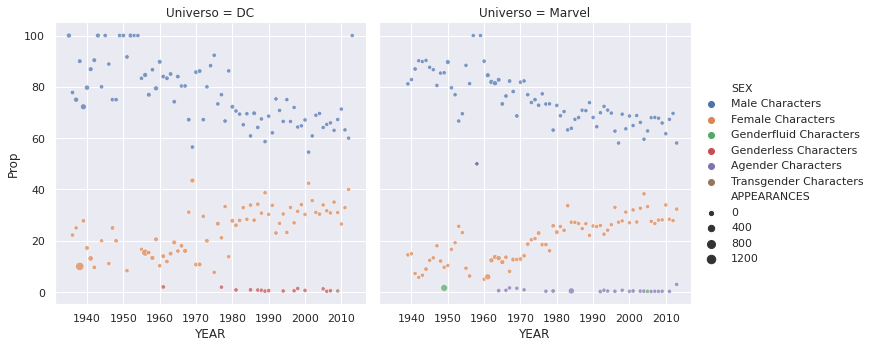

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Univers",
            hue="SEX", alpha=.7, size='APPEARANCES',
            data=inner_join_2);

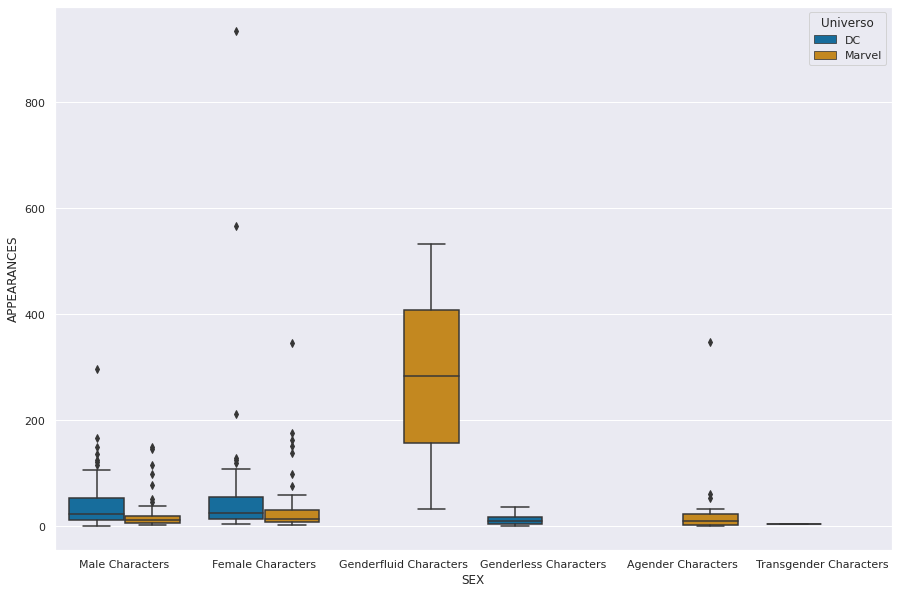

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y='APPEARANCES', x='SEX', 
                 data=inner_join_2, 
                 palette="colorblind",
                 hue='Univers')

plt.show()

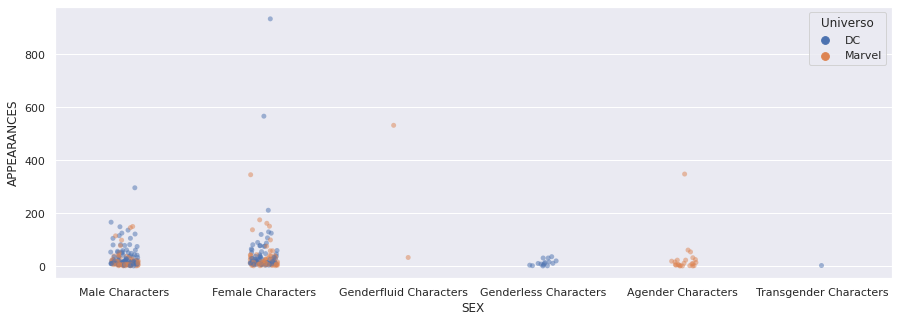

In [ ]:
plt.figure(figsize=(15,5))
sns.stripplot(y='APPEARANCES', x='SEX', 
                 data=inner_join_2, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='Univers')
plt.show()

In [ ]:
from google.colab import files
inner_join_2.to_csv('inner_join_2.csv') 
files.download('inner_join_2.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_App_max = df.groupby(['YEAR','Univers','SEX'])['APPEARANCES'].max().reset_index()
df_App_max['APPEARANCES_max'] = df_App_max['APPEARANCES'] 
df_App_max=df_App_max.drop(['APPEARANCES'], axis=1)
df_App_max

,YEAR,Universo,SEX,APPEARANCES_max
0,1935.0,DC,Male Characters,125.0
1,1936.0,DC,Female Characters,15.0
2,1936.0,DC,Male Characters,92.0
3,1937.0,DC,Female Characters,11.0
4,1937.0,DC,Male Characters,213.0
...,...,...,...,...
335,2012.0,Marvel,Male Characters,70.0
336,2013.0,DC,Male Characters,1.0
337,2013.0,Marvel,Agender Characters,28.0
338,2013.0,Marvel,Female Characters,53.0


In [ ]:
df_Imp_max = df.groupby(['YEAR','Univers','SEX'])['IMPORTANCE'].max().reset_index()
df_Imp_max['IMPORTANCE_max'] = df_Imp_max['IMPORTANCE'] 
df_Imp_max=df_Imp_max.drop(['IMPORTANCE'], axis=1)
df_Imp_max

,YEAR,Universo,SEX,IMPORTANCE_max
0,1935.0,DC,Male Characters,0.064599
1,1936.0,DC,Female Characters,0.007748
2,1936.0,DC,Male Characters,0.047521
3,1937.0,DC,Female Characters,0.005679
4,1937.0,DC,Male Characters,0.109964
...,...,...,...,...
335,2012.0,Marvel,Male Characters,0.034791
336,2013.0,DC,Male Characters,0.000497
337,2013.0,Marvel,Agender Characters,0.013910
338,2013.0,Marvel,Female Characters,0.026329


In [ ]:
inner_join_3 = pd.merge(inner_join_2,  
                      df_App_max,  
                      on =['YEAR','Univers','SEX'],  
                      how ='inner') 
inner_join_3

,YEAR,Universo,SEX,counts,Totals,Prop,page_id,APPEARANCES,Years_delta,IMPORTANCE,APPEARANCES_max
0,1935.0,DC,Male Characters,1,1,100.000000,1702.000000,125.000000,79.0,0.064599,125.0
1,1936.0,DC,Female Characters,2,9,22.222222,198449.000000,14.000000,78.0,0.007231,15.0
2,1936.0,DC,Male Characters,7,9,77.777778,126934.000000,35.333333,78.0,0.018251,92.0
3,1937.0,DC,Female Characters,1,4,25.000000,134362.000000,11.000000,77.0,0.005679,11.0
4,1937.0,DC,Male Characters,3,4,75.000000,33586.000000,149.000000,77.0,0.076923,213.0
...,...,...,...,...,...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201,69.651741,571447.921429,6.106557,2.0,0.003035,70.0
336,2013.0,DC,Male Characters,1,1,100.000000,85254.000000,1.000000,1.0,0.000497,1.0
337,2013.0,Marvel,Agender Characters,5,167,2.994012,585988.400000,16.000000,1.0,0.007948,28.0
338,2013.0,Marvel,Female Characters,54,167,32.335329,625022.666667,9.096154,1.0,0.004519,53.0


In [ ]:
inner_join_4 = pd.merge(inner_join_3,  
                      df_Imp_max,  
                      on =['YEAR','Univers','SEX'],  
                      how ='inner') 
inner_join_4

,YEAR,Universo,SEX,counts,Totals,Prop,page_id,APPEARANCES,Years_delta,IMPORTANCE,APPEARANCES_max,IMPORTANCE_max
0,1935.0,DC,Male Characters,1,1,100.000000,1702.000000,125.000000,79.0,0.064599,125.0,0.064599
1,1936.0,DC,Female Characters,2,9,22.222222,198449.000000,14.000000,78.0,0.007231,15.0,0.007748
2,1936.0,DC,Male Characters,7,9,77.777778,126934.000000,35.333333,78.0,0.018251,92.0,0.047521
3,1937.0,DC,Female Characters,1,4,25.000000,134362.000000,11.000000,77.0,0.005679,11.0,0.005679
4,1937.0,DC,Male Characters,3,4,75.000000,33586.000000,149.000000,77.0,0.076923,213.0,0.109964
...,...,...,...,...,...,...,...,...,...,...,...,...
335,2012.0,Marvel,Male Characters,140,201,69.651741,571447.921429,6.106557,2.0,0.003035,70.0,0.034791
336,2013.0,DC,Male Characters,1,1,100.000000,85254.000000,1.000000,1.0,0.000497,1.0,0.000497
337,2013.0,Marvel,Agender Characters,5,167,2.994012,585988.400000,16.000000,1.0,0.007948,28.0,0.013910
338,2013.0,Marvel,Female Characters,54,167,32.335329,625022.666667,9.096154,1.0,0.004519,53.0,0.026329


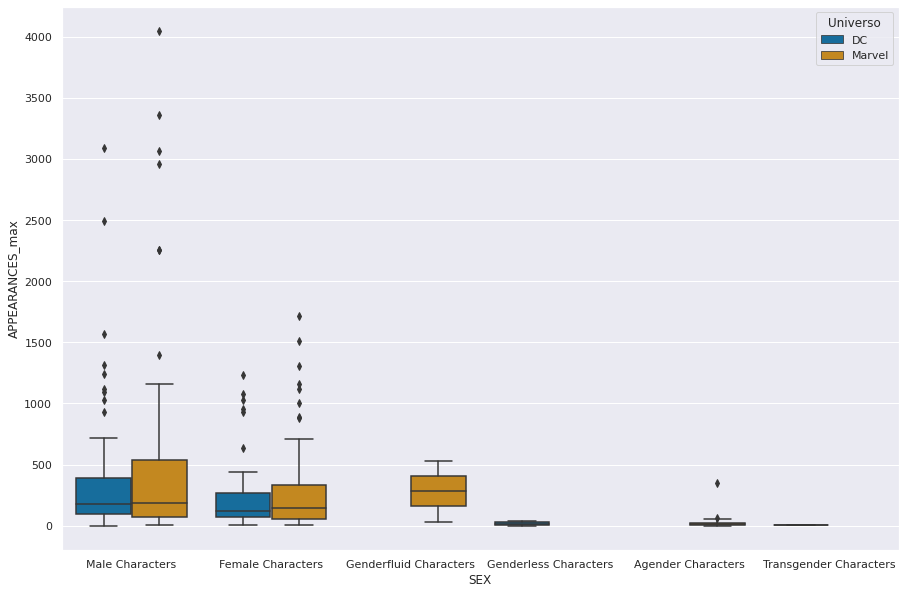

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y='APPEARANCES_max', x='SEX', 
                 data=inner_join_3, 
                 palette="colorblind",
                 hue='Univers')

plt.show()

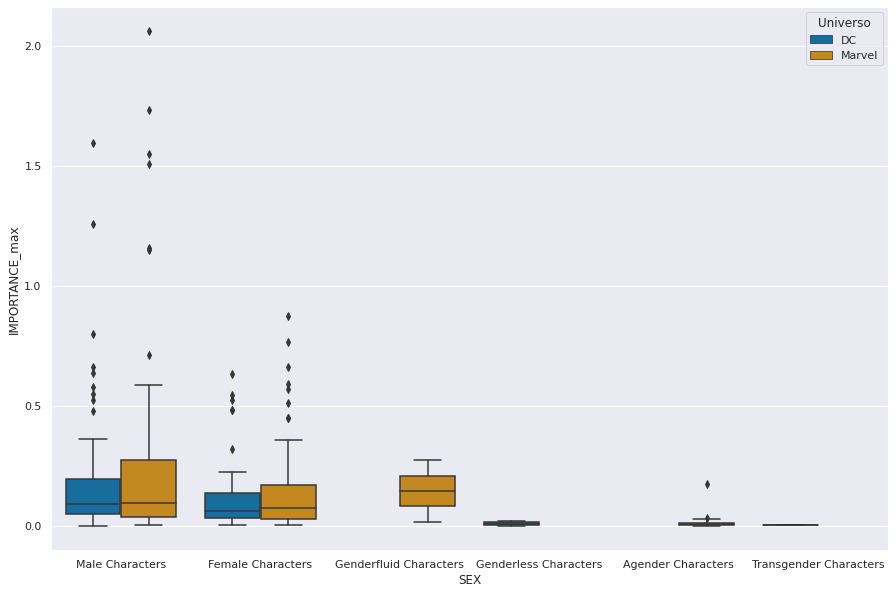

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y='IMPORTANCE_max', x='SEX', 
                 data=inner_join_3, 
                 palette="colorblind",
                 hue='Univers')

plt.show()

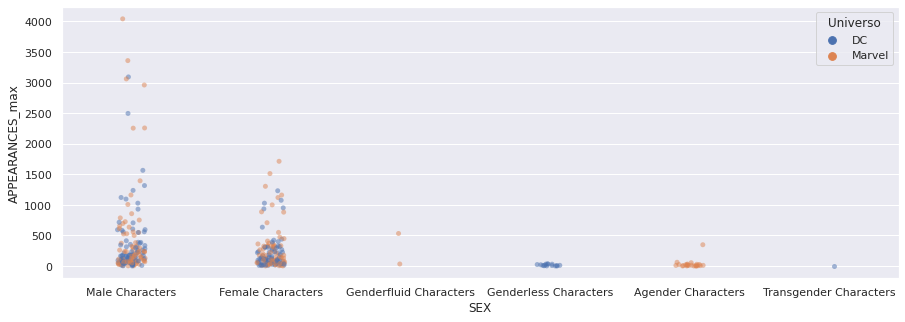

In [ ]:
plt.figure(figsize=(15,5))
sns.stripplot(y='APPEARANCES_max', x='SEX', 
                 data=inner_join_3, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='Univers')
plt.show()

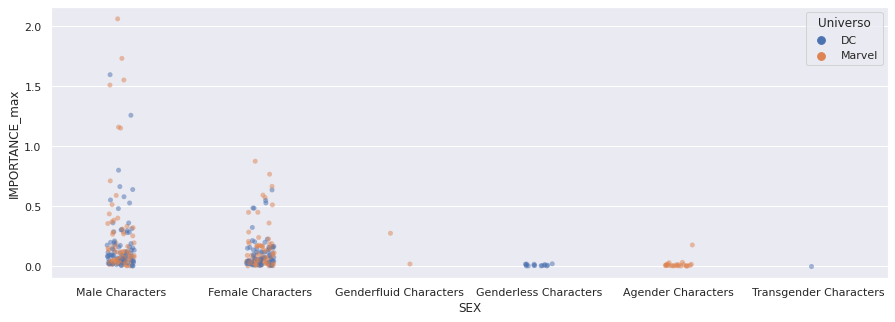

In [ ]:
plt.figure(figsize=(15,5))
sns.stripplot(y='IMPORTANCE_max', x='SEX', 
                 data=inner_join_3, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='Univers')
plt.show()

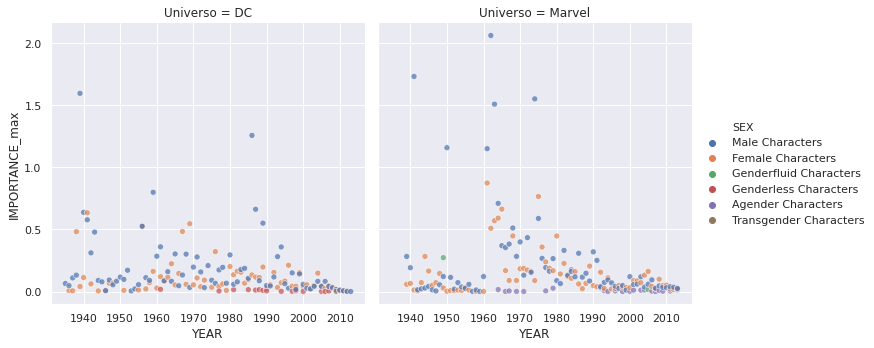

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="IMPORTANCE_max", col="Univers",
            hue="SEX", alpha=.7,
            data=inner_join_4);

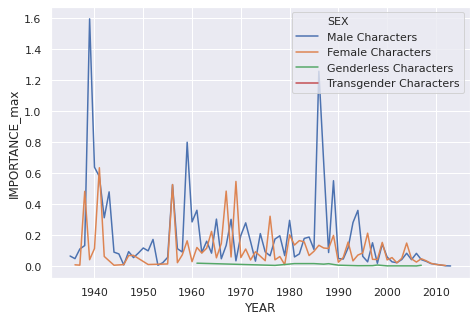

In [ ]:
plt.figure(figsize=(7.5,5))
sns.lineplot(x="YEAR", y="IMPORTANCE_max", ax=
             hue="SEX", markers="+",
             data= inner_join_4[(inner_join_4.Univers =='DC')])
plt.show()

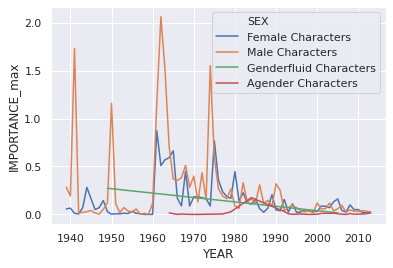

In [ ]:
sns.lineplot(x="YEAR", y="IMPORTANCE_max",
             hue="SEX",
             data= inner_join_4[(inner_join_4.Univers =='Marvel')])

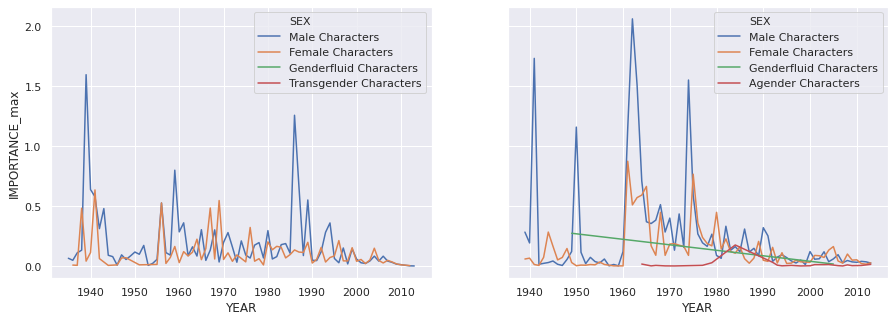

In [ ]:
# call regplot on each axes

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.lineplot(x='YEAR', y="IMPORTANCE_max",
             hue="SEX", hue_order=["Male Characters", "Female Characters", "Genderfluid Characters", "Transgender Characters"], ax=ax1,
             data= inner_join_4[(inner_join_4.Univers =='DC')])
sns.lineplot(x='YEAR', y="IMPORTANCE_max",
             hue="SEX", hue_order=["Male Characters", "Female Characters", "Genderfluid Characters", "Agender Characters"], ax=ax2,
             data= inner_join_4[(inner_join_4.Univers =='Marvel')])

plt.show()

In [ ]:
idx

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,  11.,  12.,
        15.,  16.,  19.,  20.,  23.,  26.,  27.,  30.,  33.,  34.,  37.,
        38.,  41.,  42.,  45.,  49.,  52.,  53.,  56.,  59.,  62.,  65.,
        66.,  69.,  70.,  73.,  74.,  76.,  77.,  80.,  81.,  83.,  84.,
        87.,  88.,  89.,  92.,  93.,  96.,  97., 100., 101., 105., 106.,
       109., 110., 114., 115., 119., 120., 123., 124., 128., 129., 132.,
       133., 137., 138., 141., 142., 145., 146., 149., 150., 153., 154.,
       157., 158., 159., 163., 164., 168., 169., 173., 174., 177., 178.,
       179., 182., 183., 186., 187., 190., 191., 195., 196., 197., 200.,
       201., 204., 205., 206., 209., 210., 211., 214., 215., 216., 219.,
       220., 221., 224., 225., 228., 229., 233., 234., 238., 239., 240.,
       244., 245., 249., 250., 254., 255., 256., 259., 260., 261., 265.,
       266., 269., 270., 271., 275., 276., 280., 281., 284., 285., 289.,
       290., 294., 295., 296., 300., 301., 302., 30

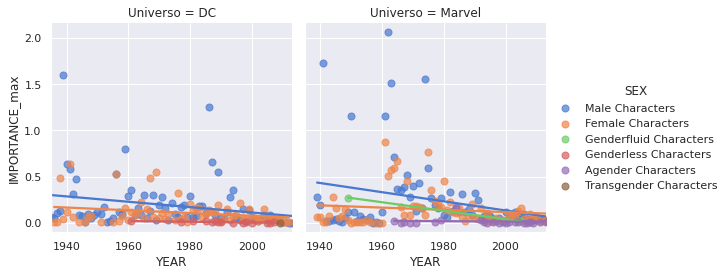

In [ ]:
sns.lmplot(x="YEAR", y="IMPORTANCE_max", col="Univers", hue="SEX", data=inner_join_4,
           col_wrap=2, ci=None, palette="muted", height=4, 
           scatter_kws={"s": 50, "alpha": 0.7})

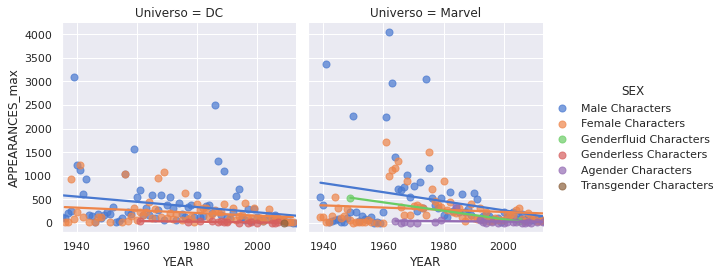

In [ ]:
sns.lmplot(x="YEAR", y="APPEARANCES_max", col="Univers", hue="SEX", data=inner_join_4,
           col_wrap=2, ci=None, palette="muted", height=4, 
           scatter_kws={"s": 50, "alpha": 0.7})



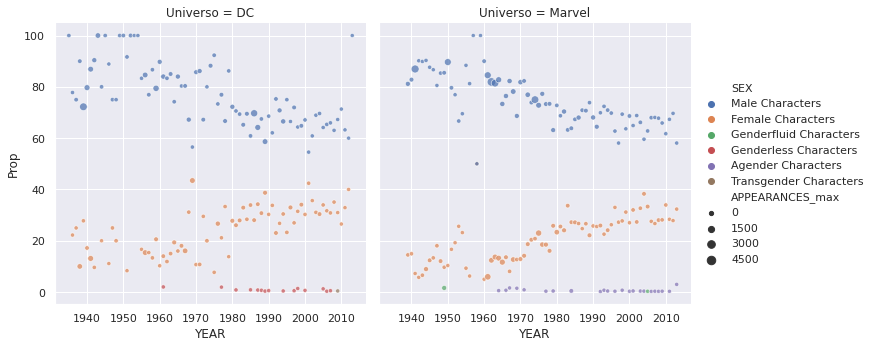

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Univers",
            hue="SEX", alpha=.7, size='APPEARANCES_max',
            data=inner_join_3);

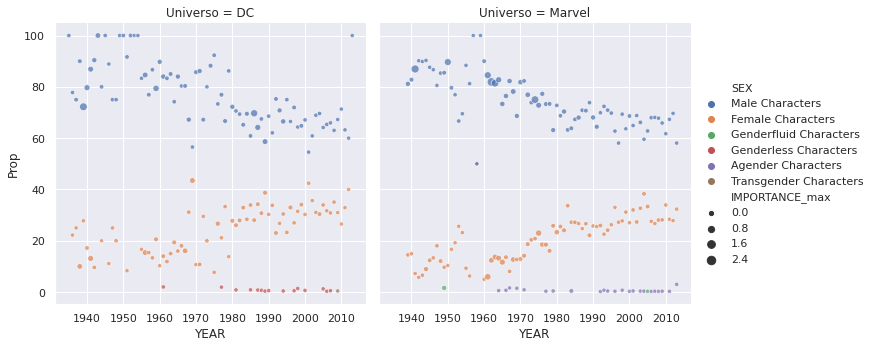

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Univers",
            hue="SEX", alpha=.7, size='IMPORTANCE_max',
            data=inner_join_3);

#*Alineación*

In [ ]:
df_Alin = df.groupby(['YEAR','Univers','ALIGN']).size().reset_index(name='counts')
df_Alin

,YEAR,Universo,ALIGN,counts
0,1936.0,DC,Good Characters,6
1,1936.0,DC,Neutral Characters,1
2,1937.0,DC,Good Characters,4
3,1938.0,DC,Good Characters,8
4,1939.0,DC,Bad Characters,4
...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26
434,2013.0,DC,Bad Characters,1
435,2013.0,Marvel,Bad Characters,49
436,2013.0,Marvel,Good Characters,40


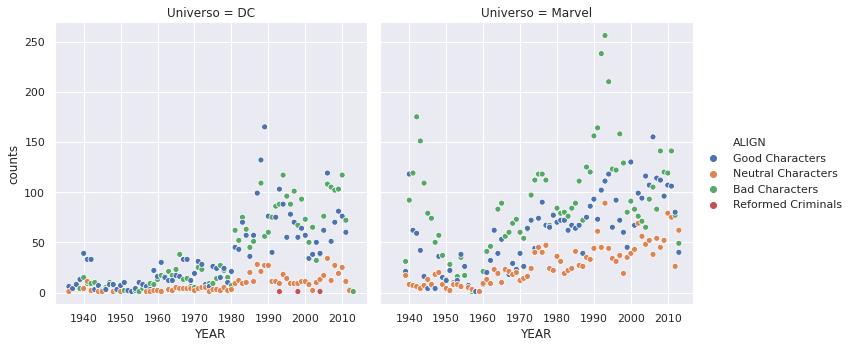

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="counts", col="Univers",
            hue="ALIGN",
            data=df_Alin);

In [ ]:
df_Alin_total = df.groupby(['YEAR','Univers']).size().reset_index(name='counts')
df_Alin_total['Totals'] = df_Alin_total['counts']
df_Alin_total = df_Alin_total.drop(['counts'], axis=1)
df_Alin_total

,YEAR,Universo,Totals
0,1935.0,DC,1
1,1936.0,DC,9
2,1937.0,DC,4
3,1938.0,DC,10
4,1939.0,DC,18
...,...,...,...
149,2011.0,Marvel,349
150,2012.0,DC,5
151,2012.0,Marvel,201
152,2013.0,DC,1


In [ ]:
Alin_join = pd.merge(df_Alin,  
                      df_Alin_total,  
                      on =['YEAR','Univers'],  
                      how ='inner') 
Alin_join

,YEAR,Universo,ALIGN,counts,Totals
0,1936.0,DC,Good Characters,6,9
1,1936.0,DC,Neutral Characters,1,9
2,1937.0,DC,Good Characters,4,4
3,1938.0,DC,Good Characters,8,10
4,1939.0,DC,Bad Characters,4,18
...,...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26,201
434,2013.0,DC,Bad Characters,1,1
435,2013.0,Marvel,Bad Characters,49,167
436,2013.0,Marvel,Good Characters,40,167


In [ ]:
Alin_join ['Prop'] = Alin_join ['counts'] / Alin_join ['Totals'] *100
Alin_join

,YEAR,Universo,ALIGN,counts,Totals,Prop
0,1936.0,DC,Good Characters,6,9,66.666667
1,1936.0,DC,Neutral Characters,1,9,11.111111
2,1937.0,DC,Good Characters,4,4,100.000000
3,1938.0,DC,Good Characters,8,10,80.000000
4,1939.0,DC,Bad Characters,4,18,22.222222
...,...,...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26,201,12.935323
434,2013.0,DC,Bad Characters,1,1,100.000000
435,2013.0,Marvel,Bad Characters,49,167,29.341317
436,2013.0,Marvel,Good Characters,40,167,23.952096


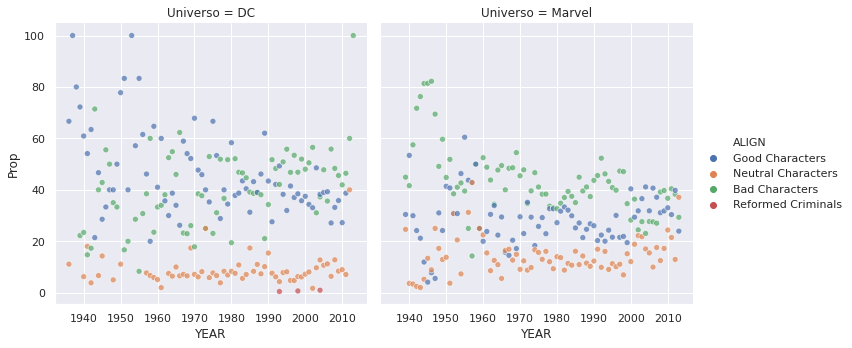

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Univers",
            hue="ALIGN", alpha=.7,
            data=Alin_join);

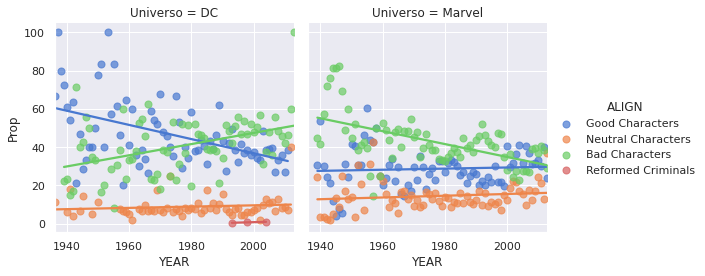

In [ ]:
sns.lmplot(x="YEAR", y="Prop", col="Univers", hue="ALIGN", data=Alin_join,
           col_wrap=2, ci=None, palette="muted", height=4, 
           scatter_kws={"s": 50, "alpha": 0.7})

In [ ]:
Alin_App_max = df.groupby(['YEAR','Univers','ALIGN'])['APPEARANCES'].max().reset_index()
Alin_App_max['APPEARANCES_max'] = Alin_App_max['APPEARANCES'] 
Alin_App_max=Alin_App_max.drop(['APPEARANCES'], axis=1)
Alin_App_max

,YEAR,Universo,ALIGN,APPEARANCES_max
0,1936.0,DC,Good Characters,52.0
1,1936.0,DC,Neutral Characters,92.0
2,1937.0,DC,Good Characters,213.0
3,1938.0,DC,Good Characters,934.0
4,1939.0,DC,Bad Characters,23.0
...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,12.0
434,2013.0,DC,Bad Characters,1.0
435,2013.0,Marvel,Bad Characters,17.0
436,2013.0,Marvel,Good Characters,53.0


In [ ]:
df_Imp_max = df.groupby(['YEAR','Univers','ALIGN'])['IMPORTANCE'].max().reset_index()
df_Imp_max['IMPORTANCE_max'] = df_Imp_max['IMPORTANCE'] 
df_Imp_max=df_Imp_max.drop(['IMPORTANCE'], axis=1)
df_Imp_max

,YEAR,Universo,ALIGN,IMPORTANCE_max
0,1936.0,DC,Good Characters,0.026860
1,1936.0,DC,Neutral Characters,0.047521
2,1937.0,DC,Good Characters,0.109964
3,1938.0,DC,Good Characters,0.481940
4,1939.0,DC,Bad Characters,0.011862
...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,0.005964
434,2013.0,DC,Bad Characters,0.000497
435,2013.0,Marvel,Bad Characters,0.008445
436,2013.0,Marvel,Good Characters,0.026329


In [ ]:
Alin_join_2 = pd.merge(Alin_join,  
                      Alin_App_max,  
                      on =['YEAR','Univers','ALIGN'],  
                      how ='inner') 
Alin_join_2

,YEAR,Universo,ALIGN,counts,Totals,Prop,APPEARANCES_max
0,1936.0,DC,Good Characters,6,9,66.666667,52.0
1,1936.0,DC,Neutral Characters,1,9,11.111111,92.0
2,1937.0,DC,Good Characters,4,4,100.000000,213.0
3,1938.0,DC,Good Characters,8,10,80.000000,934.0
4,1939.0,DC,Bad Characters,4,18,22.222222,23.0
...,...,...,...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26,201,12.935323,12.0
434,2013.0,DC,Bad Characters,1,1,100.000000,1.0
435,2013.0,Marvel,Bad Characters,49,167,29.341317,17.0
436,2013.0,Marvel,Good Characters,40,167,23.952096,53.0


In [ ]:
Alin_join_3 = pd.merge(Alin_join_2,  
                      df_Imp_max,  
                      on =['YEAR','Univers','ALIGN'],  
                      how ='inner') 
Alin_join_3

,YEAR,Universo,ALIGN,counts,Totals,Prop,APPEARANCES_max,IMPORTANCE_max
0,1936.0,DC,Good Characters,6,9,66.666667,52.0,0.026860
1,1936.0,DC,Neutral Characters,1,9,11.111111,92.0,0.047521
2,1937.0,DC,Good Characters,4,4,100.000000,213.0,0.109964
3,1938.0,DC,Good Characters,8,10,80.000000,934.0,0.481940
4,1939.0,DC,Bad Characters,4,18,22.222222,23.0,0.011862
...,...,...,...,...,...,...,...,...
433,2012.0,Marvel,Neutral Characters,26,201,12.935323,12.0,0.005964
434,2013.0,DC,Bad Characters,1,1,100.000000,1.0,0.000497
435,2013.0,Marvel,Bad Characters,49,167,29.341317,17.0,0.008445
436,2013.0,Marvel,Good Characters,40,167,23.952096,53.0,0.026329


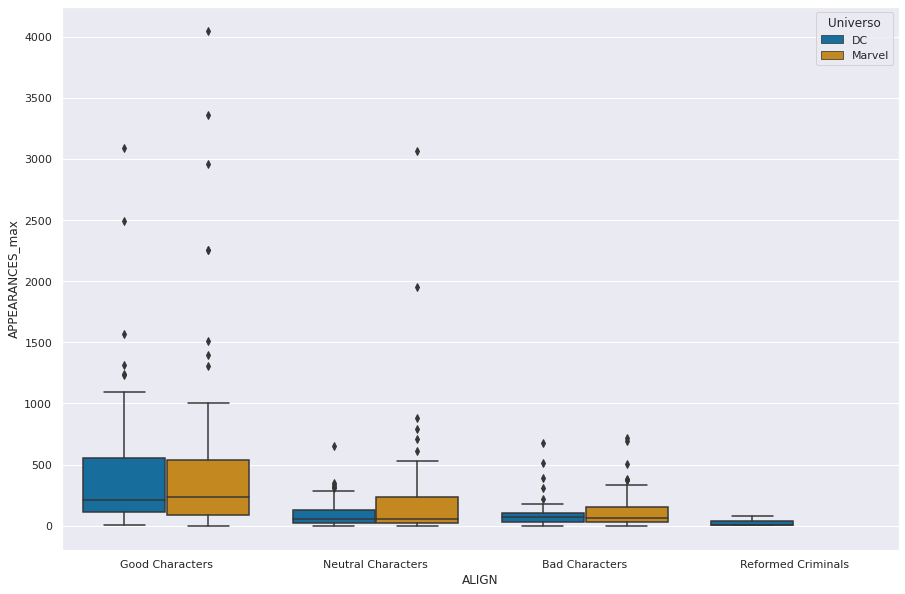

In [ ]:
plt.figure(figsize=(15,10))
sns.boxplot(y='APPEARANCES_max', x='ALIGN', 
                 data=Alin_join_2, 
                 palette="colorblind",
                 hue='Univers')

plt.show()

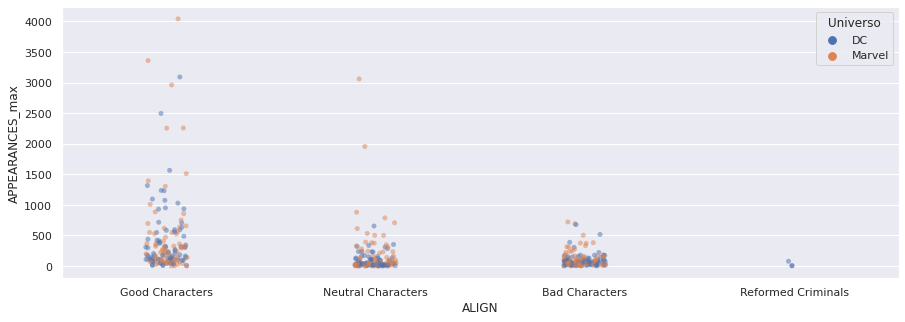

In [ ]:
plt.figure(figsize=(15,5))
sns.stripplot(y='APPEARANCES_max', x='ALIGN', 
                 data=Alin_join_2, 
                   jitter=True, 
                   marker='o', 
                   alpha=0.5,
                   hue='Univers')
plt.show()

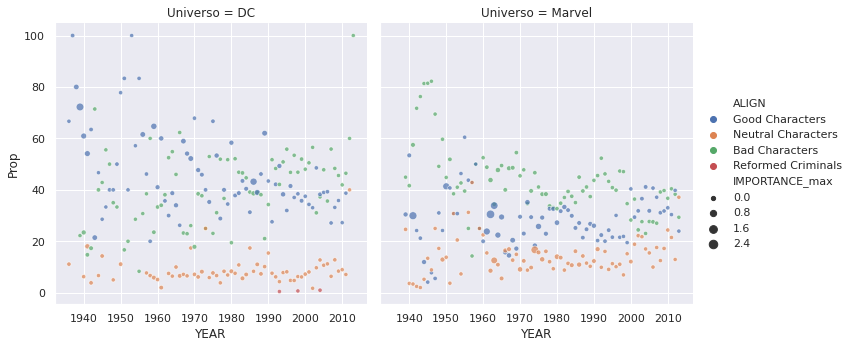

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="Prop", col="Univers",
            hue="ALIGN", alpha=.7, size='IMPORTANCE_max',
            data=Alin_join_3);

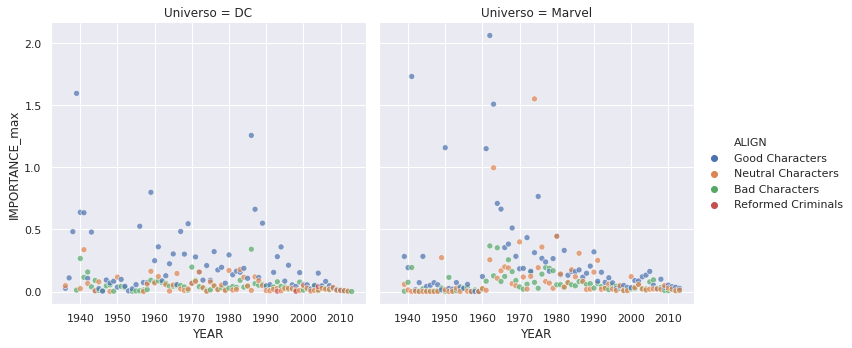

In [ ]:
sns.set()

sns.relplot(x="YEAR", y="IMPORTANCE_max", col="Univers",
            hue="ALIGN", alpha=.7,
            data=Alin_join_3);

<Figure size 1080x720 with 0 Axes>

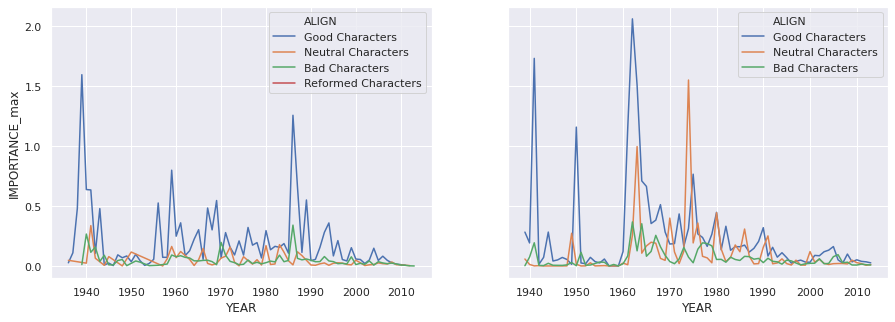

In [ ]:
plt.figure(figsize=(15,10))
# call regplot on each axes

fig, (ax1, ax2) = plt.subplots(ncols=2, sharey=True, figsize=(15,5))
sns.lineplot(x='YEAR', y="IMPORTANCE_max",
             hue="ALIGN", hue_order=["Good Characters", "Neutral Characters", "Bad Characters", "Reformed Characters"], markers="+", ax=ax1,
             data= Alin_join_3[(Alin_join_3.Univers =='DC')])
sns.lineplot(x='YEAR', y="IMPORTANCE_max",
             hue="ALIGN", hue_order=["Good Characters", "Neutral Characters", "Bad Characters"], ax=ax2,
             data= Alin_join_3[(Alin_join_3.Univers =='Marvel')])

plt.show()